#### MACHINE LEARNING

Andeo, Lovely\
2020-05405\
FX-2

**Activity 8.1 Perceptron**

1. Using your fruit feature data, take 2 classes at a time and compute the decision surface between the two classes using the perceptron algorithm.
2. Plot your data in feature space and overlay the decision line. To draw the decision line, note that an alternative form of the equation of the line is given by:\
$Ax + By = C$ or  $-C + Ax + By = 0$\
In terms of slope and y-intercept form, $y=\dfrac{C}{B}-\dfrac{A}{B}x$ where $m=-\dfrac{A}{B}$ and $b = \dfrac{C}{B}$.\
The product of inputs and weights make up an equation of the line: $w_0 +w_1x_1 +w_2x_2 =0$ (note: $x_0 =1$). With $C=-w_0$, $A=w_1$, and $B=w_2$ the decision line will have a slope $m=-w_1/w_2$ and y-intercept $b=-w_0/w_2$.
3. If there are more than two classes, compute another decision line for the other pair of classes.
4. You can now test your perceptron if it can classify fruits. Using $w_0 +w_1x_1 +w_2x_2 =0$ enter features of an unclassified fruit in x1 and x2. If the result of the equation is greater than 0 (positive) then the feature point is above the decision line so the fruit belongs to class 1, if negative then the feature point is below the decision line thus the fruit belongs to class 2.



In [52]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import label, regionprops, regionprops_table
import pandas as pd
from skimage.morphology import erosion, dilation, closing, opening

https://studylib.net/doc/25382059/smart-fruit-classification-using-neural-networks

https://www.kaggle.com/datasets/ishandandekar/fruitimagedataset



In [ ]:
from features import extract_features_graphs, extract_features_only

In [58]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Features data
feature_columns = ['mass', 'color_score']
X = fruits_df[feature_columns].values

# Labeled data
apple_lemon_df = fruits_df[(fruits_df['fruit_name'] == 'apple') | (fruits_df['fruit_name'] == 'lemon')]
apple_lemon_df['fruit_label'] = apple_lemon_df['fruit_name'].map({'apple': -1, 'lemon': 1})

# Filtered feature data
X_filtered = apple_lemon_df[feature_columns].values

# Filtered labeled data
y_filtered = apple_lemon_df['fruit_label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

class Perceptron:
    def __init__(self, num_features):
        self.weights = np.zeros(num_features)
        self.bias = 0

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        linear_output = np.dot(x, self.weights) + self.bias
        return self.activation(linear_output)

perceptron = Perceptron(num_features=X_train.shape[1])

# Hyperparameter for fine-tuning
learning_rate = 0.1
epochs = 100

for _ in range(epochs):
    for features, label in zip(X_train, y_train):
        prediction = perceptron.predict(features)
        error = label - prediction

        perceptron.weights += learning_rate * error * features
        perceptron.bias += learning_rate * error

# Predict labels for the testing set
y_pred = [perceptron.predict(features) for features in X_test]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.0


/var/folders/nd/l3h_t2k14fqdnbr6dbvvblth0000gn/T/ipykernel_9909/35895695.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_lemon_df['fruit_label'] = apple_lemon_df['fruit_name'].map({'apple': -1, 'lemon': 1})


In [59]:
apple_lemon_df

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,-1,apple,granny_smith,192,8.4,7.3,0.55
1,-1,apple,granny_smith,180,8.0,6.8,0.59
2,-1,apple,granny_smith,176,7.4,7.2,0.60
8,-1,apple,braeburn,178,7.1,7.8,0.92
9,-1,apple,braeburn,172,7.4,7.0,0.89
10,-1,apple,braeburn,166,6.9,7.3,0.93
11,-1,apple,braeburn,172,7.1,7.6,0.92
12,-1,apple,braeburn,154,7.0,7.1,0.88
13,-1,apple,golden_delicious,164,7.3,7.7,0.70
14,-1,apple,golden_delicious,152,7.6,7.3,0.69


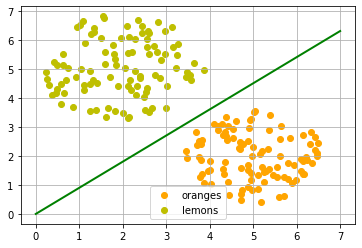

In [120]:
import numpy as np
import matplotlib.pyplot as plt

def points_within_circle(radius, 
                         center=(0, 0),
                         number_of_points=100):
    center_x, center_y = center
    r = radius * np.sqrt(np.random.random((number_of_points,)))
    theta = np.random.random((number_of_points,)) * 2 * np.pi
    x = center_x + r * np.cos(theta)
    y = center_y + r * np.sin(theta)
    return x, y

X = np.arange(0, 8)
fig, ax = plt.subplots()
oranges_x, oranges_y = points_within_circle(1.6, (5, 2), 100)
lemons_x, lemons_y = points_within_circle(1.9, (2, 5), 100)

ax.scatter(oranges_x, 
           oranges_y, 
           c="orange", 
           label="oranges")
ax.scatter(lemons_x, 
           lemons_y, 
           c="y", 
           label="lemons")

ax.plot(X, 0.9 * X, "g-", linewidth=2)

ax.legend()
ax.grid()
plt.show()

In [116]:
# has to be alternate
oranges_x = tuple(fruits_df[fruits_df['fruit_name'] == 'apple']['width'])
oranges_y = tuple(fruits_df[fruits_df['fruit_name'] == 'apple']['height'])
lemons_x = tuple(fruits_df[fruits_df['fruit_name'] == 'mandarin']['width'])
lemons_y = tuple(fruits_df[fruits_df['fruit_name'] == 'mandarin']['height'])

In [121]:
from sklearn.model_selection import train_test_split
import random

oranges = list(zip(oranges_x, oranges_y))
lemons = list(zip(lemons_x, lemons_y))

# labelling oranges with 0 and lemons with 1:
labelled_data = list(zip(oranges + lemons, 
                         [0] * len(oranges) + [1] * len(lemons)))
random.shuffle(labelled_data)

data, labels = zip(*labelled_data)

res = train_test_split(data, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=42)
train_data, test_data, train_labels, test_labels = res    
print(train_data[:10], train_labels[:10])


[(3.6323997300676947, 5.185480015890365), (5.585824923908316, 0.5978641946168908), (1.1160261592202567, 4.424653223452576), (4.327158122582734, 1.364903504462839), (5.555754064581447, 1.6136983242976985), (3.8582460806188257, 4.951294219158358), (1.6064622277691027, 3.324803807880654), (0.2520295560740815, 4.642552355196626), (3.258590938301346, 5.461364010982864), (6.307270596270372, 2.4033963922010106)] [1, 0, 1, 0, 0, 1, 1, 1, 1, 0]


In [122]:
import numpy as np
from collections import Counter

class Perceptron:
    
    def __init__(self, 
                 weights,
                 learning_rate=0.01):
        self.weights = np.array(weights)
        self.learning_rate = learning_rate
     
    # activation function:
    @staticmethod
    def unit_step_function(x):
        if  x < 0:
            return 0
        else:
            return 1
        
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return Perceptron.unit_step_function(weighted_sum)
    
    def adjust(self, 
               target_result, 
               calculated_result,
               in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data)  
        error = target_result - calculated_result
        if error != 0:
            correction = error * in_data * self.learning_rate
            self.weights += correction 
            
    def evaluate(self, data, labels):
        evaluation = Counter()
        for index in range(len(data)):
            label = int(round(p(data[index]),0))
            if label == labels[index]:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation
                

p = Perceptron(weights=[0.5, 0.1],
               learning_rate=0.3)

for index in range(len(train_data)):
    p.adjust(train_labels[index], 
             p(train_data[index]), 
             train_data[index])
    
evaluation = p.evaluate(train_data, train_labels)
print(evaluation.most_common())
evaluation = p.evaluate(test_data, test_labels)
print(evaluation.most_common())

print(p.weights)

[('correct', 160)]
[('correct', 40)]
[-2.62842804  2.60648139]


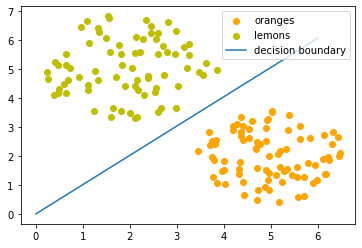

[-2.62842804  2.60648139]


In [123]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(0, 7)
fig, ax = plt.subplots()

lemons = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 1]
lemons_x, lemons_y = zip(*lemons)
oranges = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 0]
oranges_x, oranges_y = zip(*oranges)

ax.scatter(oranges_x, oranges_y, c="orange", label = 'oranges')
ax.scatter(lemons_x, lemons_y, c="y", label = 'lemons')

w1 = p.weights[0]
w2 = p.weights[1]
m = -w1 / w2
ax.plot(X, m * X, label="decision boundary")
ax.legend()
plt.show()
print(p.weights)

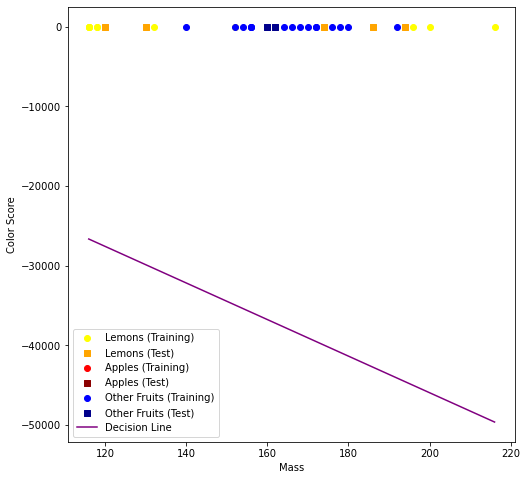

In [60]:
A = perceptron.weights[0]
B = perceptron.weights[1]
C = perceptron.bias
slope = -A / B
intercept = C / B

plt.figure(figsize=(8, 8))

# Scatter plot for lemons (class 1)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='yellow', label='Lemons (Training)')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], c='orange', marker='s', label='Lemons (Test)')

# Scatter plot for apples (class 4)
plt.scatter(X_train[y_train == 4, 0], X_train[y_train == 4, 1], c='red', label='Apples (Training)')
plt.scatter(X_test[y_test == 4, 0], X_test[y_test == 4, 1], c='darkred', marker='s', label='Apples (Test)')

# Scatter plot for other fruits (class 2 and class 3)
plt.scatter(X_train[(y_train != 1) & (y_train != 4), 0], X_train[(y_train != 1) & (y_train != 4), 1], c='blue', label='Other Fruits (Training)')
plt.scatter(X_test[(y_test != 1) & (y_test != 4), 0], X_test[(y_test != 1) & (y_test != 4), 1], c='darkblue', marker='s', label='Other Fruits (Test)')

x_decision = np.linspace(np.min(np.concatenate([X_train[:, 0], X_test[:, 0]])), np.max(np.concatenate([X_train[:, 0], X_test[:, 0]])), num=100)
y_decision = slope * x_decision + intercept
plt.plot(x_decision, y_decision, color='purple', label='Decision Line')

plt.xlabel('Mass')
plt.ylabel('Color Score')
plt.legend()
plt.show()


In [57]:
from sklearn.model_selection import train_test_split

# Features data
feature_columns = ['mass', 'color_score']
X_features = fruits_df[feature_columns].values

# Labeled data for apple and lemon
apple_lemon_df = fruits_df[(fruits_df['fruit_name'] == 'apple') | (fruits_df['fruit_name'] == 'lemon')]
apple_lemon_df['fruit_label'] = apple_lemon_df['fruit_name'].map({'apple': 0, 'lemon': 1})
X_apple_lemon = apple_lemon_df[feature_columns].values
y_apple_lemon = apple_lemon_df['fruit_label'].values

# Split the feature and labeled data for apple and lemon
X_train, X_test, y_train, y_test = train_test_split(X_apple_lemon, y_apple_lemon, test_size=0.2, random_state=42)

# Combine feature and labeled data for training
X_train_combined = np.concatenate((X_train, X_features), axis=0)
y_train_combined = np.concatenate((y_train, np.zeros(len(X_features))), axis=0)

# Train the perceptron model with apple and lemon data
perceptron = Perceptron(num_features=X_train_combined.shape[1])

# Hyperparameter for fine-tuning
learning_rate = 0.1
epochs = 100

for _ in range(epochs):
    for features, label in zip(X_train_combined, y_train_combined):
        prediction = perceptron.predict(features)
        error = label - prediction

        perceptron.weights += learning_rate * error * features
        perceptron.bias += learning_rate * error

# Predict labels for the testing set
y_pred = [perceptron.predict(features) for features in X_test]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification of other fruits
X_other_fruits = X_features
y_other_fruits = perceptron.predict(X_other_fruits)

# Plotting the decision surface
import matplotlib.pyplot as plt

# Decision line parameters
A = perceptron.weights[0]
B = perceptron.weights[1]
C = perceptron.bias
slope = -A / B
intercept = C / B

# Scatter plot of apple and lemon data
plt.scatter(X_apple_lemon[:, 0], X_apple_lemon[:, 1], c=y_apple_lemon, label='Apple and Lemon')

# Scatter plot of other fruits data
plt.scatter(X_other_fruits[:, 0], X_other_fruits[:, 1], c=y_other_fruits, label='Other Fruits', marker='s')

# Decision line
x_decision = np.linspace(np.min(X_features[:, 0]), np.max(X_features[:, 0]), num=100)
y_decision = slope * x_decision + intercept
plt.plot(x_decision, y_decision, color='red', label='Decision Line')

plt.xlabel('Mass')
plt.ylabel('Color Score')
plt.legend()
plt.show()


Accuracy: 0.2857142857142857


/var/folders/nd/l3h_t2k14fqdnbr6dbvvblth0000gn/T/ipykernel_9909/2635206288.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_lemon_df['fruit_label'] = apple_lemon_df['fruit_name'].map({'apple': 0, 'lemon': 1})


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [61]:
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

apples = list(zip(fruits_df[fruits_df['fruit_name'] == 'apple']['mass'], fruits_df[fruits_df['fruit_name'] == 'apple']['color_score']))
lemons = list(zip(fruits_df[fruits_df['fruit_name'] == 'lemon']['mass'], fruits_df[fruits_df['fruit_name'] == 'lemon']['color_score']))

# labelling apples with 0 and lemons with 1:
labelled_data = list(zip(apples + lemons, [0] * len(apples) + [1] * len(lemons)))
random.shuffle(labelled_data)

data, labels = zip(*labelled_data)

res = train_test_split(data, labels, train_size=0.8, test_size=0.2, random_state=42)
train_data, test_data, train_labels, test_labels = res    
print(train_data[:10], train_labels[:10])


[(116, 0.73), (162, 0.83), (196, 0.72), (180, 0.59), (156, 0.69), (216, 0.71), (192, 0.55), (194, 0.7), (130, 0.71), (166, 0.93)] [1, 0, 1, 0, 0, 1, 0, 1, 1, 0]


In [71]:

class Perceptron:
    
    def __init__(self, 
                 weights,
                 learning_rate=0.01):
        self.weights = np.array(weights)
        self.learning_rate = learning_rate
     
    # activation function:
    @staticmethod
    def unit_step_function(x):
        if  x < 0:
            return 0
        else:
            return 1
        
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return Perceptron.unit_step_function(weighted_sum)
    
    def adjust(self, 
               target_result, 
               calculated_result,
               in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data)  
        error = target_result - calculated_result
        if error != 0:
            correction = error * in_data * self.learning_rate
            self.weights += correction 
            
    def evaluate(self, data, labels):
        evaluation = Counter()
        for index in range(len(data)):
            label = int(round(p(data[index]),0))
            if label == labels[index]:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation
                

p = Perceptron(weights=[0.1, 0.5],
               learning_rate=0.1)

for index in range(len(train_data)):
    p.adjust(train_labels[index], 
             p(train_data[index]), 
             train_data[index])
    
evaluation = p.evaluate(train_data, train_labels)
print(evaluation.most_common())
evaluation = p.evaluate(test_data, test_labels)
print(evaluation.most_common())

print(p.weights)

[('correct', 16), ('wrong', 12)]
[('wrong', 4), ('correct', 3)]
[-11.3     0.452]


In [81]:
class Perceptron:
    
    def __init__(self, weights, learning_rate=0.01):
        self.weights = np.array(weights)
        self.learning_rate = learning_rate
     
    @staticmethod
    def unit_step_function(x):
        if x < 0:
            return 0
        else:
            return 1
        
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return Perceptron.unit_step_function(weighted_sum)
    
    def adjust(self, target_result, calculated_result, in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data)  
        error = target_result - calculated_result
        if error != 0:
            correction = error * in_data * self.learning_rate
            self.weights += correction 
            
    def evaluate(self, data, labels):
        evaluation = Counter()
        for index in range(len(data)):
            label = int(round(self(data[index]), 0))
            if label == labels[index]:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation


p = Perceptron(weights=[0.1, 0.5], learning_rate=0.01)
epochs = 10

for epoch in range(epochs):
    for index in range(len(train_data)):
        p.adjust(train_labels[index], p(train_data[index]), train_data[index])
    
    train_evaluation = p.evaluate(train_data, train_labels)
    test_evaluation = p.evaluate(test_data, test_labels)
    
    print(f"Epoch {epoch + 1}: Train Accuracy = {train_evaluation['correct'] / len(train_data):.2f}, "
          f"Test Accuracy = {test_evaluation['correct'] / len(test_data):.2f}")

print("Training complete.")

evaluation = p.evaluate(train_data, train_labels)
print("Training Set Evaluation:")
print(evaluation.most_common())

evaluation = p.evaluate(test_data, test_labels)
print("Test Set Evaluation:")
print(evaluation.most_common())

print("Final Weights:")
print(p.weights)


Epoch 1: Train Accuracy = 0.57, Test Accuracy = 0.43
Epoch 2: Train Accuracy = 0.57, Test Accuracy = 0.43
Epoch 3: Train Accuracy = 0.57, Test Accuracy = 0.43
Epoch 4: Train Accuracy = 0.57, Test Accuracy = 0.43
Epoch 5: Train Accuracy = 0.57, Test Accuracy = 0.43
Epoch 6: Train Accuracy = 0.57, Test Accuracy = 0.43
Epoch 7: Train Accuracy = 0.57, Test Accuracy = 0.43
Epoch 8: Train Accuracy = 0.57, Test Accuracy = 0.43
Epoch 9: Train Accuracy = 0.57, Test Accuracy = 0.43
Epoch 10: Train Accuracy = 0.57, Test Accuracy = 0.43
Training complete.
Training Set Evaluation:
[('correct', 16), ('wrong', 12)]
Test Set Evaluation:
[('wrong', 4), ('correct', 3)]
Final Weights:
[-1.1     0.5525]


In [ ]:

X = np.arange(0, 7)
fig, ax = plt.subplots()

lemons = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 1]
lemons_x, lemons_y = zip(*lemons)
oranges = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 0]
oranges_x, oranges_y = zip(*oranges)

ax.scatter(oranges_x, oranges_y, c="orange")
ax.scatter(lemons_x, lemons_y, c="y")

w1 = p.weights[0]
w2 = p.weights[1]
m = -w1 / w2
ax.plot(X, m * X, label="decision boundary")
ax.legend()
plt.show()
print(p.weights)

In [ ]:
# fruit_df show have the names of the fruit and features

fruit_classes = {
    'Apple': 0,
    'Banana': 1
}

fruit_df['Class'] = fruit_df['Fruit'].map(fruit_classes)

from sklearn.model_selection import train_test_split

X = fruit_df[['Chromaticity', 'Eccentricity']].values
y = fruit_df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

class Perceptron:
    
    def __init__(self, weights, learning_rate=0.01):
        self.weights = np.array(weights)
        self.learning_rate = learning_rate
     
    @staticmethod
    def unit_step_function(x):
        if x < 0:
            return 0
        else:
            return 1
        
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return Perceptron.unit_step_function(weighted_sum)
    
    def adjust(self, target_result, calculated_result, in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data)  
        error = target_result - calculated_result
        if error != 0:
            correction = error * in_data * self.learning_rate
            self.weights += correction 
            
    def evaluate(self, data, labels):
        evaluation = Counter()
        for index in range(len(data)):
            label = int(round(self(data[index]), 0))
            if label == labels[index]:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation
# Initialize the perceptron
p = Perceptron(weights=[0.5, 0.1], learning_rate=0.3)

# Training loop
for index in range(len(X_train)):
    p.adjust(y_train[index], p(X_train[index]), X_train[index])

# Evaluation on training data
evaluation_train = p.evaluate(X_train, y_train)
print("Training data evaluation:", evaluation_train.most_common())

# Evaluation on test data
evaluation_test = p.evaluate(X_test, y_test)
print("Test data evaluation:", evaluation_test.most_common())

# Final weights
print("Final weights:", p.weights)


In [ ]:
# Plotting the fruits and decision boundary
fig, ax = plt.subplots()

# Plot apples
apples = fruit_df[fruit_df['Class'] == 0]
ax.scatter(apples['Chromaticity'], apples['Eccentricity'], color='red', label='Apples')

# Plot bananas
bananas = fruit_df[fruit_df['Class'] == 1]
ax.scatter(bananas['Chromaticity'], bananas['Eccentricity'], color='yellow', label='Bananas')

# Plot other fruits
other_fruits = fruit_df[~fruit_df['Class'].isin([0, 1])]
ax.scatter(other_fruits['Chromaticity'], other_fruits['Eccentricity'], color='blue', label='Other Fruits')

# Plot decision boundary
x_decision = np.linspace(0, 1, 100)
y_decision = (-p.weights[0] * x_decision - p.weights[2]) / p.weights[1]
ax.plot(x_decision, y_decision, 'g-', linewidth=2, label='Decision Boundary')

ax.legend()
ax.grid()
plt.xlabel('Chromaticity')
plt.ylabel('Eccentricity')
plt.title('Fruit Classification')
plt.show()

**Activity 8.2 Logistic Regression**

1. Select a fruit that changes color as it ripens. For example, banana or mango. Gather several images of ripe and unripe fruit, including those in between. For each image get the average red, green and blue color of the fruit (instead of a 0 to 255 digital range, normalize it to 0 to 1.0 for each channel) and label it 1 for ripe, 0 for unripe.
2. Apply logistic regression to train an artificial neuron to give the degree of ripeness of that the fruit. Plot the Test with images not yet seen by the neuron and comment if the output agrees with the visual appearance.